## Mini Project III

In [51]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px

seed = 0

In [126]:
df = pd.read_csv("C:/Taslim/LHL/Week_5_cluster/mini-project-III/twm_customer.csv",sep=';')
df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [114]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [102]:
df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


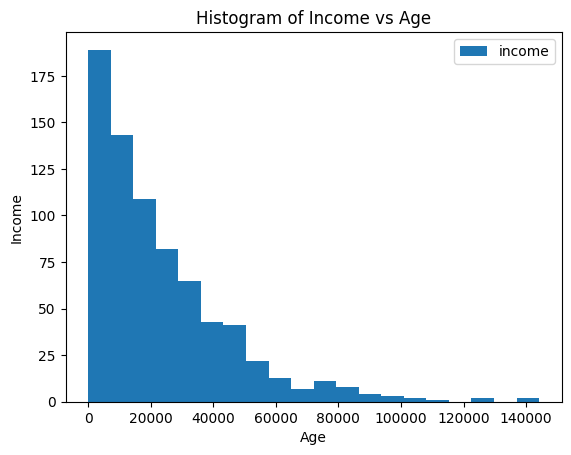

In [103]:
# plot a histogram of income vs age
df.plot(kind='hist', x='age', y='income', bins=20)

# add axis labels and a title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Histogram of Income vs Age')

# show the plot
plt.show()

In [104]:
# print the unique values in the marital_status column
print(df['marital_status'].unique())

[2 1 4 3]


C:\Users\niles\AppData\Local\Temp\ipykernel_6776\3107515492.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('marital_status').mean()


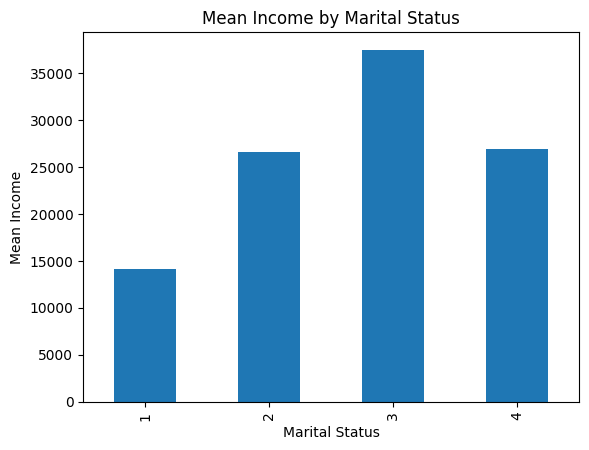

In [105]:
# group the DataFrame by marital_status and calculate the mean income
grouped = df.groupby('marital_status').mean()

# plot the bar graph
grouped['income'].plot(kind='bar')
plt.title('Mean Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Income')
plt.show()

In [106]:
# calculate the correlation between marital_status and nbr_children
# This will help to reduce the number of attributes used for clustering
corr = df['marital_status'].corr(df['nbr_children'])

print(f"Correlation between marital_status and nbr_children: {corr:.2f}")

Correlation between marital_status and nbr_children: 0.48


C:\Users\niles\AppData\Local\Temp\ipykernel_6776\1254652393.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('gender').mean()


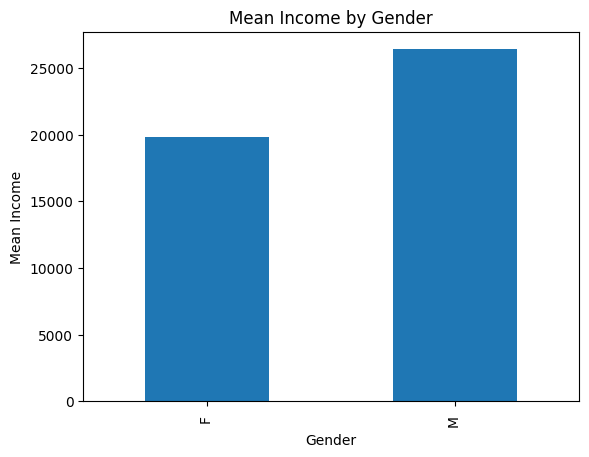

In [107]:
# group the DataFrame by marital_status and calculate the mean income
grouped = df.groupby('gender').mean()

# plot the bar graph
grouped['income'].plot(kind='bar')
plt.title('Mean Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Income')
plt.show()

In [108]:
# print the unique values in the marital_status column
print(df['name_prefix'].unique())

['        ' 'Mr.     ' 'Ms.     ' 'Mrs.    ' 'Dr.     ' 'Miss    ']


C:\Users\niles\AppData\Local\Temp\ipykernel_6776\3790187297.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('name_prefix').mean()


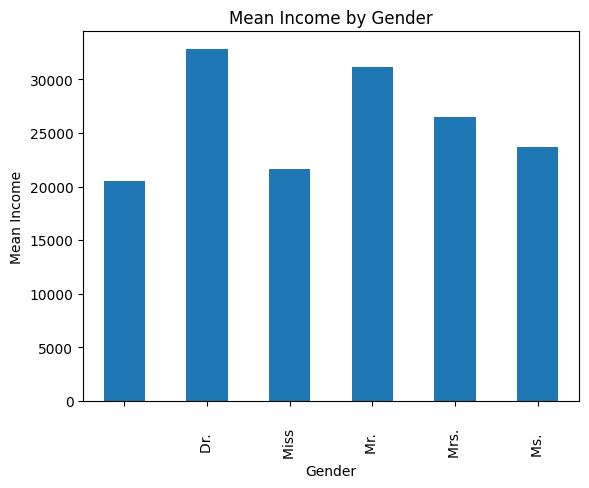

In [109]:
# group the DataFrame by marital_status and calculate the mean income
grouped = df.groupby('name_prefix').mean()

# plot the bar graph
grouped['income'].plot(kind='bar')
plt.title('Mean Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Income')
plt.show()

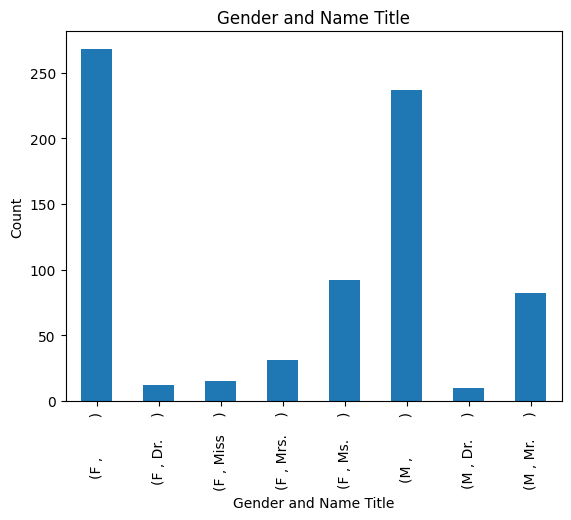

In [110]:
# count the number of occurrences of each combination of gender and name_title
counts = df.groupby(['gender', 'name_prefix']).size()

# create a bar plot of the counts
counts.plot(kind='bar')
plt.title('Gender and Name Title')
plt.xlabel('Gender and Name Title')
plt.ylabel('Count')
plt.show()

In [115]:
# convert 'gender' column to categorical variable
df['gender'] = df['gender'].astype('category')

In [121]:
df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [127]:
# Drop the original categorical columns and concatenate the encoded data with the rest of the data
df = df.drop(['name_prefix', 'first_name', 'last_name', 'street_name', 'city_name', 'state_code','cust_id','street_nbr','postal_code','nbr_children','gender'], axis=1)

In [128]:
#df.columns = df.columns.astype(str) 
df.head()

,income,age,years_with_bank,marital_status
0,26150,46,5,2
1,6605,71,1,2
2,18548,38,8,1
3,47668,54,3,1
4,44554,59,9,4


C:\Users\niles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\niles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\niles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

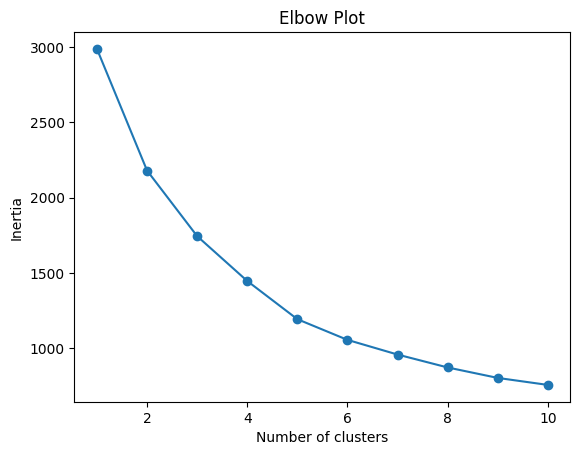

In [130]:
# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# choose the number of clusters
k = 10

# create a KMeans object with k clusters
kmeans = KMeans(n_clusters=k)

# fit the KMeans object to the standardized data
kmeans.fit(X)

# obtain the inertia values for each value of k
inertias = []
for i in range(1, k+1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# plot the elbow plot
plt.plot(range(1, k+1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [131]:
# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

C:\Users\niles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [132]:
# Get the cluster labels for each data point
clusters = kmeans.labels_

# Add the cluster labels as a column in the dataframe
df['cluster'] = clusters

In [133]:
df.describe()

,income,age,years_with_bank,marital_status,cluster
count,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,3.907631,1.882195,1.267738
std,22207.221405,19.114879,2.675634,0.892051,0.560606
min,0.000000,13.000000,0.000000,1.000000,0.000000
25%,7118.500000,28.000000,2.000000,1.000000,1.000000
50%,17242.000000,42.000000,4.000000,2.000000,1.000000
75%,31338.000000,56.000000,6.000000,2.000000,2.000000
max,144157.000000,89.000000,9.000000,4.000000,2.000000


In [134]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   income           747 non-null    int64
 1   age              747 non-null    int64
 2   years_with_bank  747 non-null    int64
 3   marital_status   747 non-null    int64
 4   cluster          747 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 26.4 KB


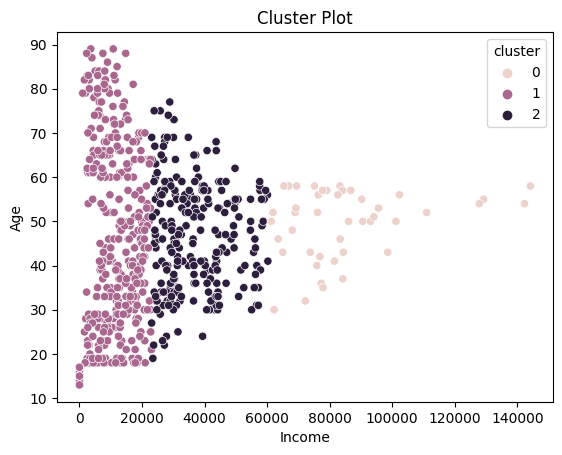

In [135]:
# Create a scatterplot
sns.scatterplot(x='income', y='age', hue='cluster', data=df)

# Add labels and title to the plot
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Cluster Plot')

# Show the plot
plt.show()

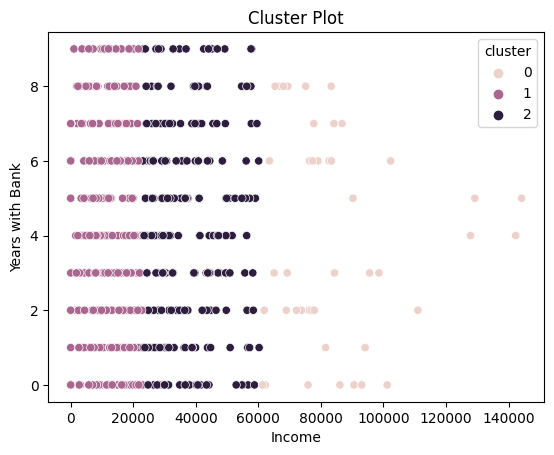

In [137]:
# Create a scatterplot
sns.scatterplot(x='income', y='years_with_bank', hue='cluster', data=df)

# Add labels and title to the plot
plt.xlabel('Income')
plt.ylabel('Years with Bank')
plt.title('Cluster Plot')

# Show the plot
plt.show()

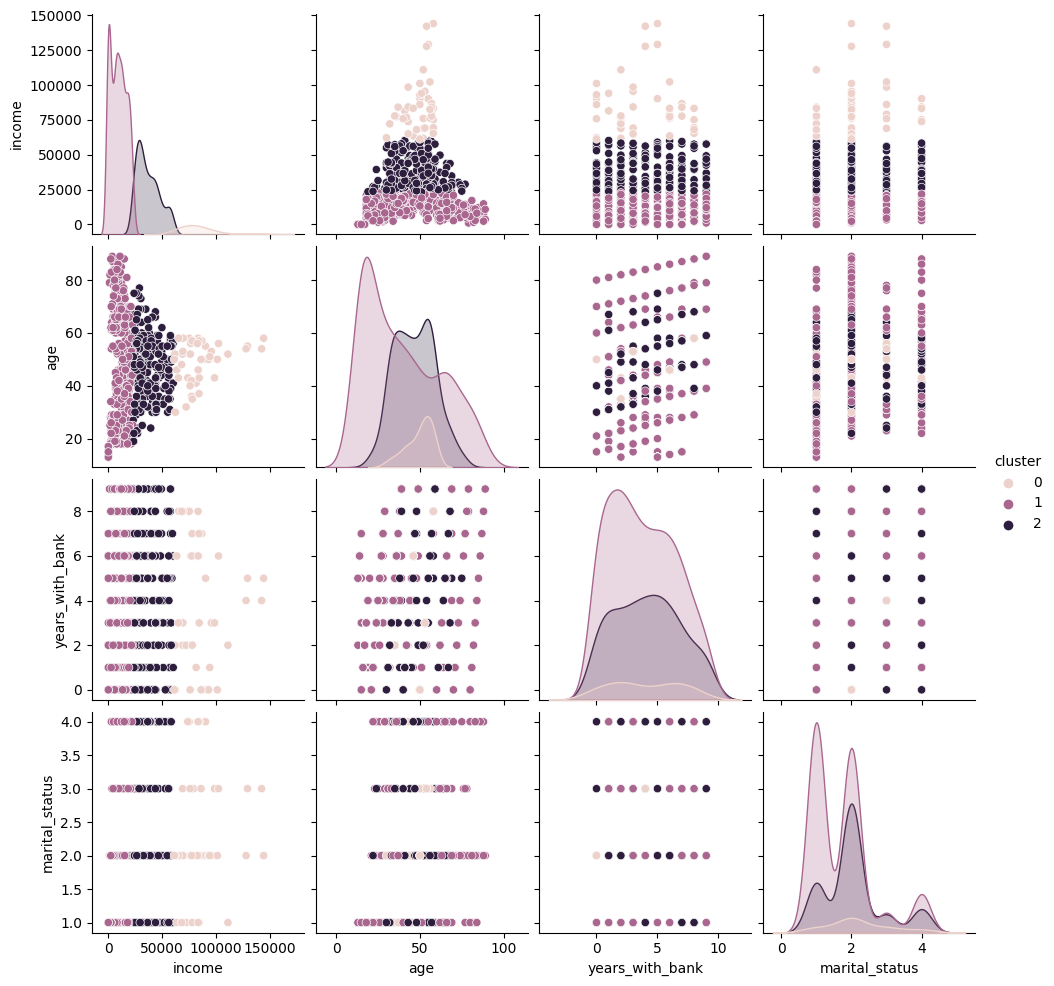

In [138]:
columns = ['income', 'age', 'years_with_bank','cluster','marital_status']

# Create a pairplot
sns.pairplot(df[columns], hue='cluster')

# Show the plot
plt.show()